## import the library we need.

In [1]:
import pandas as pd
import seaborn as sns

## read csv

In [2]:
result = pd.read_csv('results.csv', delimiter=',')

In [3]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


# (a) Use pandas to print the column names in the dataset.

In [4]:
result.columns.tolist()

['date',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'tournament',
 'city',
 'country',
 'neutral']

# (b) Use describe() of pandas to print a description of the numeric columns. 

In [5]:
result.describe()

,home_score,away_score
count,43081.000000,43081.000000
mean,1.743228,1.183608
std,1.753982,1.400620
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# (c) Use pandas to create a new data frame containing only matches with both teams coming from 2 of the 4 countries: Argentina, Brazil, England and Germany

In [6]:
country_keep = ['Argentina', 'Brazil', 'England', 'Germany']

result_c = result.copy()

## use for-loop, if-else, and set
# home_team_drop_id = [i for i, country in enumerate(result_c['home_team'], 0) if country not in country_keep]
# away_team_drop_id = [i for i, country in enumerate(result_c['away_team'], 0) if country not in country_keep]
# drop_id = list(set(home_team_drop_id) | set(away_team_drop_id))
# result_c.drop(drop_id, inplace=True)

# use 'unique' and 'dropna'
country_type_dict = {i: i if i in country_keep else float("nan") for i in result_c['home_team'].unique()}
result_c.loc[:, 'home_team'] = result_c.loc[:, 'home_team'].map(country_type_dict)
result_c.loc[:, 'away_team'] = result_c.loc[:, 'away_team'].map(country_type_dict)
result_c.dropna(inplace=True)

# use 'drop' with conditions
# result_c.drop(result_c[result_c.home_team == country_keep[0]].index, inplace=True)

result_c

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
410,1914-09-20,Argentina,Brazil,3.0,0.0,Friendly,Buenos Aires,Argentina,False
411,1914-09-27,Argentina,Brazil,0.0,1.0,Copa Roca,Buenos Aires,Argentina,False
442,1916-07-10,Argentina,Brazil,1.0,1.0,Copa América,Buenos Aires,Argentina,False
472,1917-10-03,Argentina,Brazil,4.0,2.0,Copa América,Montevideo,Uruguay,True
508,1919-05-18,Brazil,Argentina,3.0,1.0,Copa América,Rio de Janeiro,Brazil,False
...,...,...,...,...,...,...,...,...,...
41039,2019-07-02,Brazil,Argentina,2.0,0.0,Copa América,Belo Horizonte,Brazil,False
41334,2019-10-09,Germany,Argentina,2.0,2.0,Friendly,Dortmund,Germany,False
42476,2021-06-29,England,Germany,2.0,0.0,UEFA Euro,London,England,False
42511,2021-07-10,Brazil,Argentina,0.0,1.0,Copa América,Rio de Janeiro,Brazil,False


# (d) Use pandas to create a new data frame called df6 containing only matches played between England and Germany.

In [7]:
df6 = result[result['home_team'].isin(['England', 'Germany'])]
df6 = df6[df6['away_team'].isin(['England', 'Germany'])]

## (i) Do a scatterplot of the data contained in df6. Use ‘home_score’ and ‘away_score’ as x and y respectively. Use hue to represent ‘home_team’.

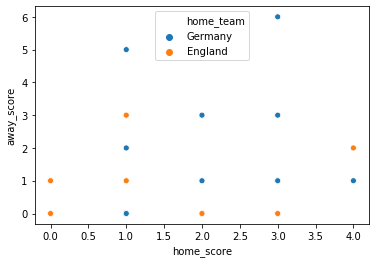

In [8]:
sns.scatterplot(x='home_score', y='away_score', data=df6, hue='home_team')

# import matplotlib.pyplot as plt
# plt.legend(loc='upper right')

## (ii) What is the maximum number of goals scored by one team in all the England vs Germany matches?

In [9]:
England_home_max = df6[df6['home_team'] == 'England']['home_score'].max()
England_away_max = df6[df6['away_team'] == 'England']['away_score'].max()
Germany_home_max = df6[df6['home_team'] == 'Germany']['home_score'].max()
Germany_away_max = df6[df6['away_team'] == 'Germany']['away_score'].max()
print('The maximum number of goals scored by England when it is home team: ', England_home_max)
print('The maximum number of goals scored by England when it is away team: ', England_away_max)
print('The maximum number of goals scored by Germany when it is home team: ', Germany_home_max)
print('The maximum number of goals scored by Germany when it is away team: ', Germany_away_max)
print('The maximum number of goals scored by England: ', max(England_home_max, England_away_max))
print('The maximum number of goals scored by Germany: ', max(Germany_home_max, Germany_away_max))
print('The maximum number of goals: ', max(England_home_max, England_away_max, Germany_home_max, Germany_away_max))

The maximum number of goals scored by England when it is home team:  4.0
The maximum number of goals scored by England when it is away team:  6.0
The maximum number of goals scored by Germany when it is home team:  4.0
The maximum number of goals scored by Germany when it is away team:  3.0
The maximum number of goals scored by England:  6.0
The maximum number of goals scored by Germany:  4.0
The maximum number of goals:  6.0


## (iii) Print a heatmap of home vs away scores for England vs Germany matches.

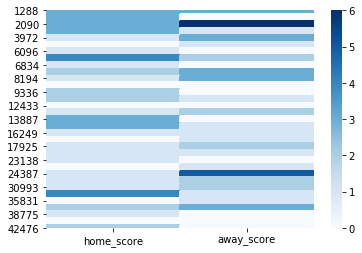

In [10]:
sns.heatmap(df6[['home_score', 'away_score']], cmap='Blues')

## (iv) Write a code segment to compute England’s home win rate, away win rate, and total win rate against Germany

In [11]:
n_game = df6.shape[0]
England_home_win = df6[df6['home_score'] > df6['away_score']].shape[0]
England_away_win = df6[df6['home_score'] < df6['away_score']].shape[0]
print('England’s home win rate against Germany: {:.2f} %.'.format((England_home_win / n_game) * 100))
print('England’s away win rate against Germany: {:.2f} %.'.format((England_away_win / n_game) * 100))
print('England’s total win rate against Germany: {:.2f} %.'.format(((England_home_win + England_away_win) / n_game) * 100))

England’s home win rate against Germany: 39.39 %.
England’s away win rate against Germany: 42.42 %.
England’s total win rate against Germany: 81.82 %.
